## CLASSIFICATION

https://github.com/hfawaz/dl-4-tsc/blob/master/classifiers/resnet.py#L23

In [16]:
# necessray imports
import pandas as pd
from pprint import pprint
import json
from typing import Union
from pathlib import Path
import glob
from scipy import stats
import os

import tensorflow as tf 
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, accuracy_score

import random 
import numpy as np 


from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras import layers

from sklearn.model_selection import KFold

## Try with 9 classes

In [17]:
def create_dataset(X, y, time_steps=1, step=1):
    Xx, Yy = [], []
    if (len(X) < time_steps):
        print('too short')
    else:
        for i in range(0, len(X) - time_steps, step):
            label = y.iloc[i+time_steps-1]
            data = X.iloc[i:(i + time_steps)].values.astype(float)
            #data[:,0] = data[:,0].astype(int)
            #data[:,1:] = data[:,1:].astype(float)
            if ((y.iloc[i+time_steps-1] != 10) & (y.iloc[i+time_steps-1] != 9)):
                Yy.append(label)
                Xx.append(data)

    return np.array(Xx).reshape(-1, 4), np.array(Yy).reshape(-1, 1)

In [18]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

X, Y = [], []
X_val, Y_val = [], [] 
subject_IDs = ['540', '544', '552',  '559', '563', '567', '570', '575', '584', '588', '591','596']
path = 'CODE/GAPS_DATA/TRAIN/'

## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    frames  = []
    X_subject, y_subject = [], []
# store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

# create list of the csv files
    for file in csv_files:
        df = pd.read_csv(file)
        frames.append(df)
        df = pd.read_csv(file)
        df['glucose'] = df['glucose'].astype(int)
        Xdata, Ydata = create_dataset(df[['glucose', 'basal', 'bolus', 'macc']], df['Class'], time_steps=72, step=1)
        Xdata = Xdata.reshape(-1, 72, 4)
        Ydata = Ydata.reshape(-1, 1)
        X_subject.append(Xdata)
        y_subject.append(Ydata)
    X_subject = np.vstack(X_subject)
    y_subject = np.vstack(y_subject)
    labels_dftest1 = pd.DataFrame(y_subject, columns = ['label'])
    class_occurencestest1 = np.bincount(labels_dftest1['label'])
    print(class_occurencestest1)

    X_s_train,  X_s_val, y_s_train, y_s_val = train_test_split(X_subject , y_subject, test_size=0.20, shuffle = False)
    X.append(X_s_train)
    Y.append(y_s_train)

    X_val.append(X_s_val)
    Y_val.append(y_s_val)

   
## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
# store all paths of csv files in one folder
    

    
## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
# store all paths of csv files in one folder


[ 911  294  280  531  965 1564 2504 1640 3111]
[ 184   78   69  110  192  398  842  864 2142]
[ 428  133  128  243  474  911 1565 1200 2202]
[ 475  164  150  288  539 1037 1958 1633 3106]
[ 327  124  118  217  415  685 1283 1138 2577]
[ 943  140  125  238  442  834 1567 1255 2837]
[ 227   87   77  137  250  406  720  710 1828]
[1208  270  242  449  842 1498 2553 1807 3164]
[ 130   70   64  126  236  404  589  528 1394]
[ 138   77   68  132  241  453  757  645 1472]
[ 615  217  200  383  731 1282 2141 1838 3436]
[ 270  139  125  224  433  832 1445 1314 2949]


## ResNet

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
89/89 [==============================] - 2s 22ms/step


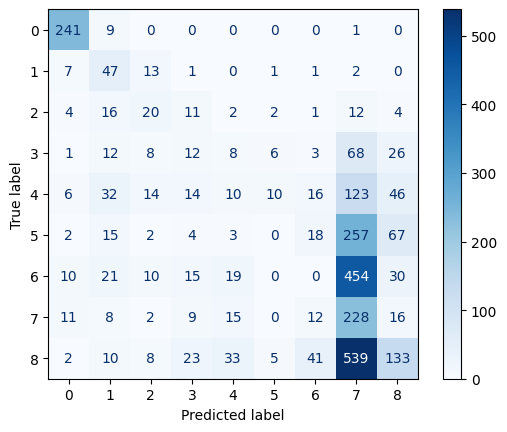

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       251
           1       0.28      0.65      0.39        72
           2       0.26      0.28      0.27        72
           3       0.13      0.08      0.10       144
           4       0.11      0.04      0.06       271
           5       0.00      0.00      0.00       368
           6       0.00      0.00      0.00       559
           7       0.14      0.76      0.23       301
           8       0.41      0.17      0.24       794

    accuracy                           0.24      2832
   macro avg       0.24      0.33      0.24      2832
weighted avg       0.24      0.24      0.20      2832

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
37/37 [==============================] - 1s 21ms/step


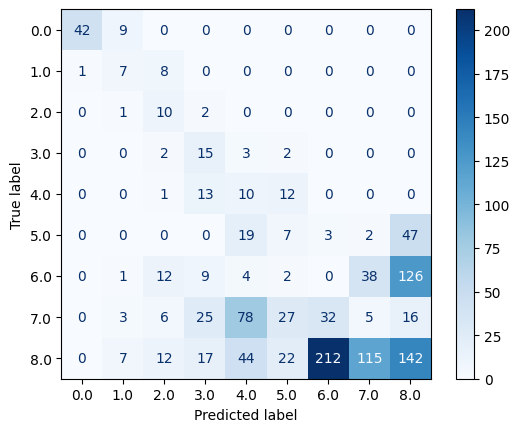

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89        51
         1.0       0.25      0.44      0.32        16
         2.0       0.20      0.77      0.31        13
         3.0       0.19      0.68      0.29        22
         4.0       0.06      0.28      0.10        36
         5.0       0.10      0.09      0.09        78
         6.0       0.00      0.00      0.00       192
         7.0       0.03      0.03      0.03       192
         8.0       0.43      0.25      0.31       571

    accuracy                           0.20      1171
   macro avg       0.25      0.37      0.26      1171
weighted avg       0.27      0.20      0.22      1171

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
55/55 [==============================] - 1s 22ms/step


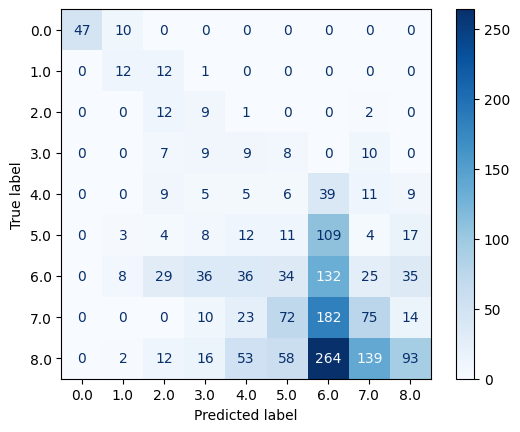

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        57
         1.0       0.34      0.48      0.40        25
         2.0       0.14      0.50      0.22        24
         3.0       0.10      0.21      0.13        43
         4.0       0.04      0.06      0.04        84
         5.0       0.06      0.07      0.06       168
         6.0       0.18      0.39      0.25       335
         7.0       0.28      0.20      0.23       376
         8.0       0.55      0.15      0.23       637

    accuracy                           0.23      1749
   macro avg       0.30      0.32      0.28      1749
weighted avg       0.35      0.23      0.23      1749

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
71/71 [==============================] - 2s 21ms/step


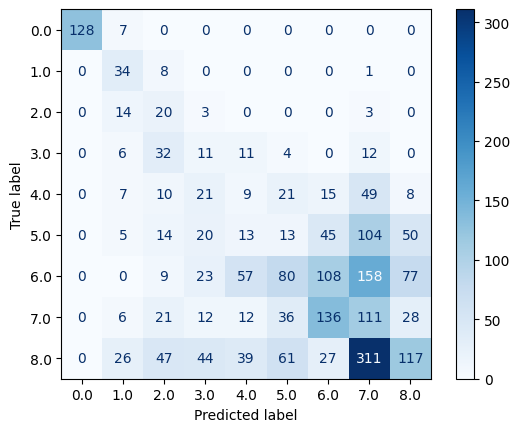

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       135
         1.0       0.32      0.79      0.46        43
         2.0       0.12      0.50      0.20        40
         3.0       0.08      0.14      0.10        76
         4.0       0.06      0.06      0.06       140
         5.0       0.06      0.05      0.05       264
         6.0       0.33      0.21      0.26       512
         7.0       0.15      0.31      0.20       362
         8.0       0.42      0.17      0.25       672

    accuracy                           0.25      2244
   macro avg       0.28      0.35      0.28      2244
weighted avg       0.31      0.25      0.25      2244

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
52/52 [==============================] - 1s 22ms/step


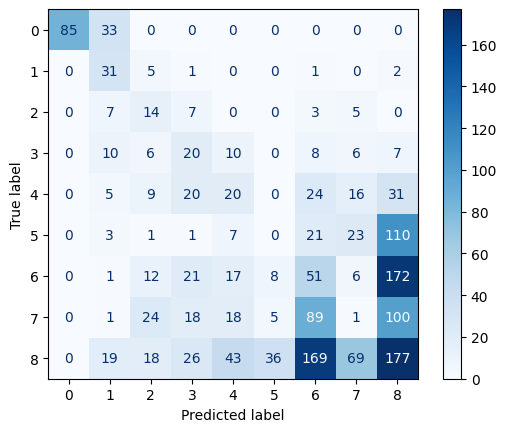

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       118
           1       0.28      0.78      0.41        40
           2       0.16      0.39      0.22        36
           3       0.18      0.30      0.22        67
           4       0.17      0.16      0.17       125
           5       0.00      0.00      0.00       166
           6       0.14      0.18      0.16       288
           7       0.01      0.00      0.01       256
           8       0.30      0.32      0.31       557

    accuracy                           0.24      1653
   macro avg       0.25      0.32      0.26      1653
weighted avg       0.23      0.24      0.23      1653

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
63/63 [==============================] - 1s 22ms/step


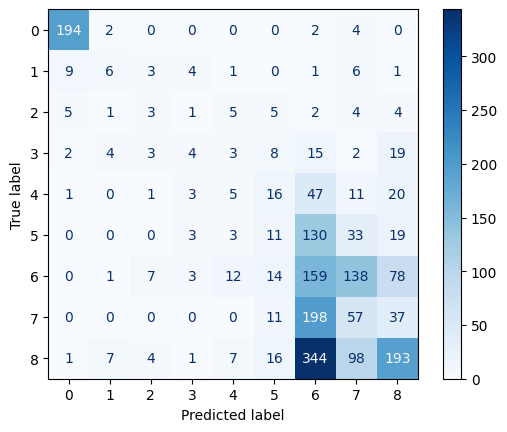

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       202
           1       0.29      0.19      0.23        31
           2       0.14      0.10      0.12        30
           3       0.21      0.07      0.10        60
           4       0.14      0.05      0.07       104
           5       0.14      0.06      0.08       199
           6       0.18      0.39      0.24       412
           7       0.16      0.19      0.17       303
           8       0.52      0.29      0.37       671

    accuracy                           0.31      2012
   macro avg       0.30      0.25      0.26      2012
weighted avg       0.36      0.31      0.31      2012

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
34/34 [==============================] - 1s 21ms/step


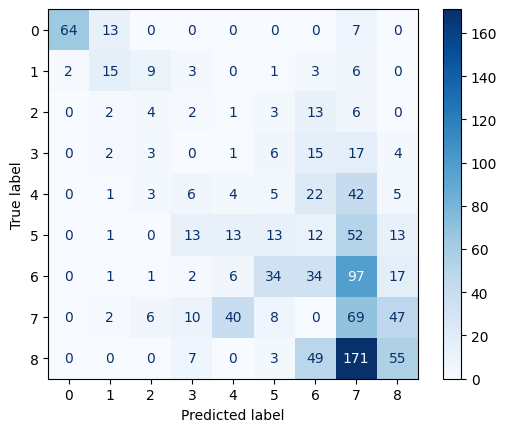

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        84
           1       0.41      0.38      0.39        39
           2       0.15      0.13      0.14        31
           3       0.00      0.00      0.00        48
           4       0.06      0.05      0.05        88
           5       0.18      0.11      0.14       117
           6       0.23      0.18      0.20       192
           7       0.15      0.38      0.21       182
           8       0.39      0.19      0.26       285

    accuracy                           0.24      1066
   macro avg       0.28      0.24      0.25      1066
weighted avg       0.29      0.24      0.25      1066

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
91/91 [==============================] - 2s 21ms/step


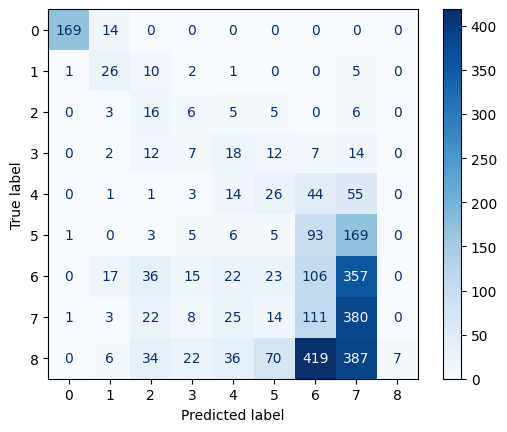

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       183
           1       0.36      0.58      0.44        45
           2       0.12      0.39      0.18        41
           3       0.10      0.10      0.10        72
           4       0.11      0.10      0.10       144
           5       0.03      0.02      0.02       282
           6       0.14      0.18      0.16       576
           7       0.28      0.67      0.39       564
           8       1.00      0.01      0.01       981

    accuracy                           0.25      2888
   macro avg       0.35      0.33      0.26      2888
weighted avg       0.50      0.25      0.19      2888

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
27/27 [==============================] - 1s 22ms/step


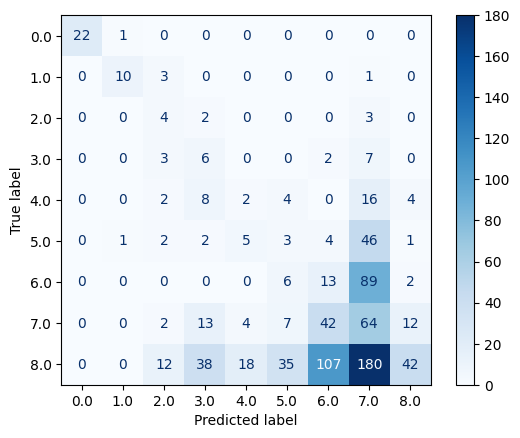

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        23
         1.0       0.83      0.71      0.77        14
         2.0       0.14      0.44      0.22         9
         3.0       0.09      0.33      0.14        18
         4.0       0.07      0.06      0.06        36
         5.0       0.05      0.05      0.05        64
         6.0       0.08      0.12      0.09       110
         7.0       0.16      0.44      0.23       144
         8.0       0.69      0.10      0.17       432

    accuracy                           0.20       850
   macro avg       0.35      0.36      0.30       850
weighted avg       0.44      0.20      0.19       850

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
30/30 [==============================] - 1s 21ms/step


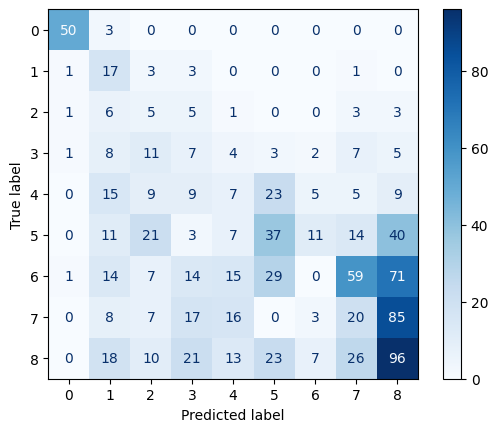

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.17      0.68      0.27        25
           2       0.07      0.21      0.10        24
           3       0.09      0.15      0.11        48
           4       0.11      0.09      0.10        82
           5       0.32      0.26      0.29       144
           6       0.00      0.00      0.00       210
           7       0.15      0.13      0.14       156
           8       0.31      0.45      0.37       214

    accuracy                           0.25       956
   macro avg       0.24      0.32      0.26       956
weighted avg       0.21      0.25      0.22       956

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
82/82 [==============================] - 2s 22ms/step


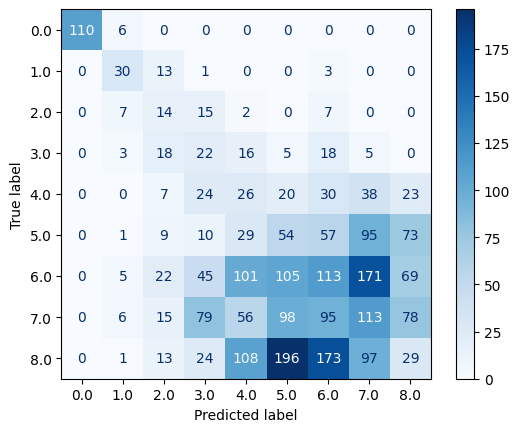

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       116
         1.0       0.51      0.64      0.57        47
         2.0       0.13      0.31      0.18        45
         3.0       0.10      0.25      0.14        87
         4.0       0.08      0.15      0.10       168
         5.0       0.11      0.16      0.13       328
         6.0       0.23      0.18      0.20       631
         7.0       0.22      0.21      0.21       540
         8.0       0.11      0.05      0.06       641

    accuracy                           0.20      2603
   macro avg       0.28      0.32      0.29      2603
weighted avg       0.21      0.20      0.19      2603

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
58/58 [==============================] - 1s 22ms/step


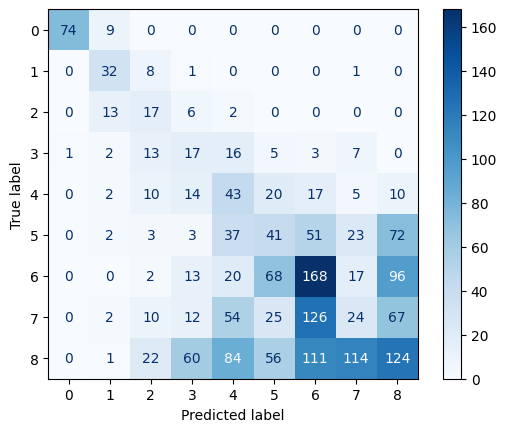

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.51      0.76      0.61        42
           2       0.20      0.45      0.28        38
           3       0.13      0.27      0.18        64
           4       0.17      0.36      0.23       121
           5       0.19      0.18      0.18       232
           6       0.35      0.44      0.39       384
           7       0.13      0.07      0.09       320
           8       0.34      0.22      0.26       572

    accuracy                           0.29      1856
   macro avg       0.33      0.40      0.35      1856
weighted avg       0.30      0.29      0.28      1856


Mean accuracy of individuum: 0.2418, Standard deviation of individuum: 0.0339


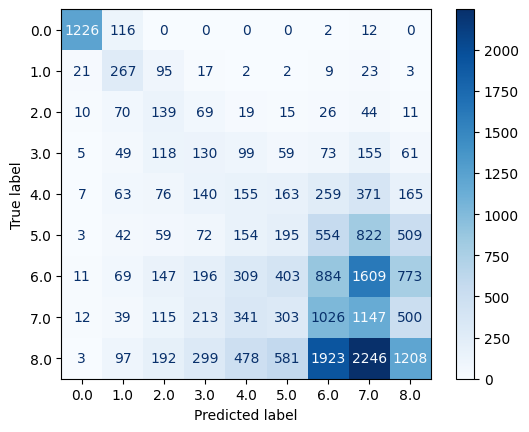

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      1356
         1.0       0.33      0.61      0.43       439
         2.0       0.15      0.34      0.21       403
         3.0       0.11      0.17      0.14       749
         4.0       0.10      0.11      0.10      1399
         5.0       0.11      0.08      0.09      2410
         6.0       0.19      0.20      0.19      4401
         7.0       0.18      0.31      0.23      3696
         8.0       0.37      0.17      0.24      7027

    accuracy                           0.24     21880
   macro avg       0.28      0.32      0.28     21880
weighted avg       0.28      0.24      0.24     21880



In [22]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)



# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,72,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv , y_train_indiv, test_size=0.20, shuffle = False)


    



    filename =  "Models/ResNet_Population_%i.hdf5" % (count)
    model_CV_D = tf.keras.models.load_model(filename)
    
    
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    #name_img_test = "Confusion_Matrices/Neu_ResNet_Indi_%i.png" % (count)
    #plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

 
    
    count = count+1



# INDIVIDUUM


# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
#name_img_test = "Confusion_Matrices/Hybrid_Indi_All.png" 
#plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

## Hybrid Model

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
89/89 [==============================] - 3s 28ms/step


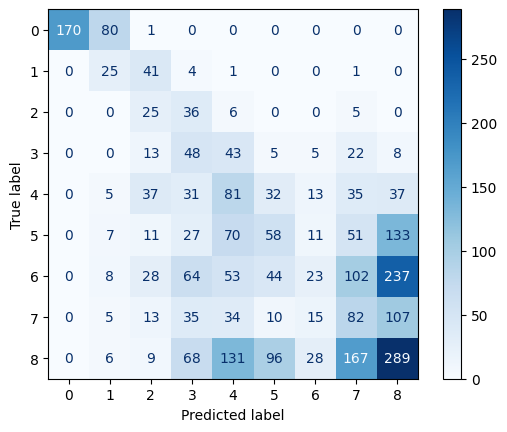

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       251
           1       0.18      0.35      0.24        72
           2       0.14      0.35      0.20        72
           3       0.15      0.33      0.21       144
           4       0.19      0.30      0.23       271
           5       0.24      0.16      0.19       368
           6       0.24      0.04      0.07       559
           7       0.18      0.27      0.21       301
           8       0.36      0.36      0.36       794

    accuracy                           0.28      2832
   macro avg       0.30      0.32      0.28      2832
weighted avg       0.32      0.28      0.28      2832

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
37/37 [==============================] - 2s 30ms/step


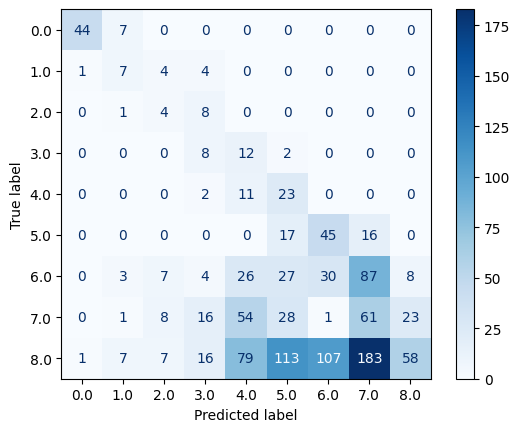

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        51
         1.0       0.27      0.44      0.33        16
         2.0       0.13      0.31      0.19        13
         3.0       0.14      0.36      0.20        22
         4.0       0.06      0.31      0.10        36
         5.0       0.08      0.22      0.12        78
         6.0       0.16      0.16      0.16       192
         7.0       0.18      0.32      0.23       192
         8.0       0.65      0.10      0.18       571

    accuracy                           0.20      1171
   macro avg       0.29      0.34      0.27      1171
weighted avg       0.43      0.20      0.21      1171

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
55/55 [==============================] - 2s 30ms/step


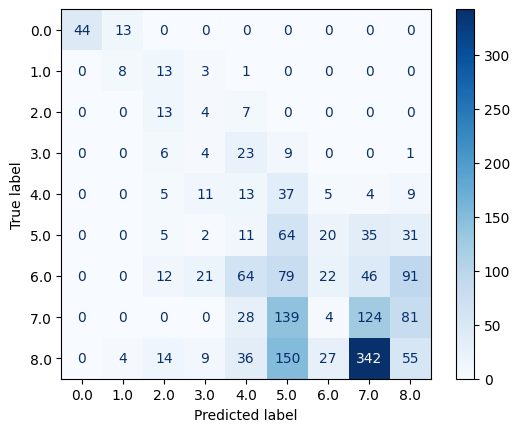

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        57
         1.0       0.32      0.32      0.32        25
         2.0       0.19      0.54      0.28        24
         3.0       0.07      0.09      0.08        43
         4.0       0.07      0.15      0.10        84
         5.0       0.13      0.38      0.20       168
         6.0       0.28      0.07      0.11       335
         7.0       0.23      0.33      0.27       376
         8.0       0.21      0.09      0.12       637

    accuracy                           0.20      1749
   macro avg       0.28      0.30      0.26      1749
weighted avg       0.24      0.20      0.18      1749

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
71/71 [==============================] - 2s 28ms/step


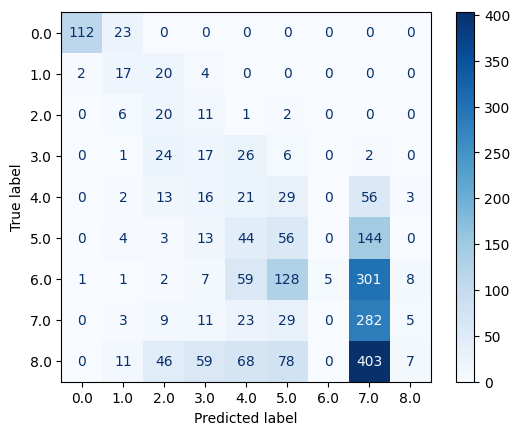

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       135
         1.0       0.25      0.40      0.31        43
         2.0       0.15      0.50      0.23        40
         3.0       0.12      0.22      0.16        76
         4.0       0.09      0.15      0.11       140
         5.0       0.17      0.21      0.19       264
         6.0       1.00      0.01      0.02       512
         7.0       0.24      0.78      0.36       362
         8.0       0.30      0.01      0.02       672

    accuracy                           0.24      2244
   macro avg       0.37      0.35      0.25      2244
weighted avg       0.45      0.24      0.17      2244

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
52/52 [==============================] - 2s 30ms/step


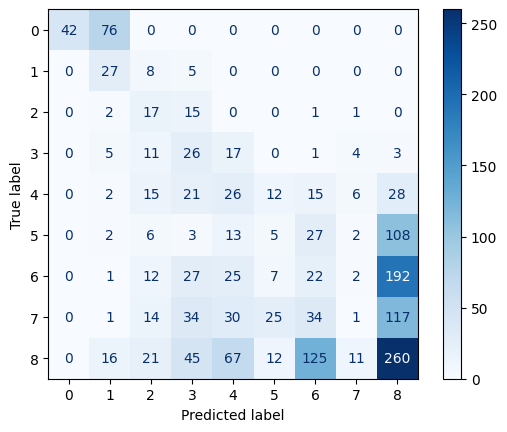

              precision    recall  f1-score   support

           0       1.00      0.36      0.53       118
           1       0.20      0.68      0.31        40
           2       0.16      0.47      0.24        36
           3       0.15      0.39      0.21        67
           4       0.15      0.21      0.17       125
           5       0.08      0.03      0.04       166
           6       0.10      0.08      0.09       288
           7       0.04      0.00      0.01       256
           8       0.37      0.47      0.41       557

    accuracy                           0.26      1653
   macro avg       0.25      0.30      0.22      1653
weighted avg       0.25      0.26      0.23      1653

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
63/63 [==============================] - 2s 31ms/step


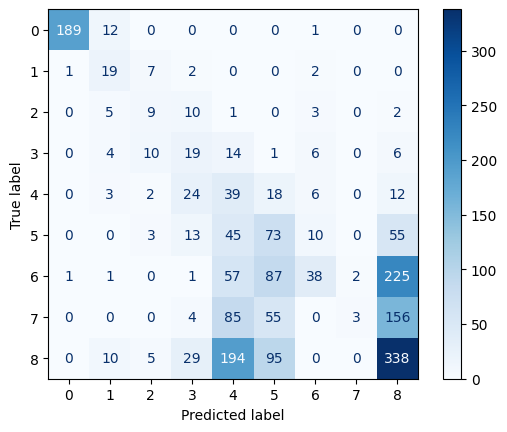

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       202
           1       0.35      0.61      0.45        31
           2       0.25      0.30      0.27        30
           3       0.19      0.32      0.23        60
           4       0.09      0.38      0.14       104
           5       0.22      0.37      0.28       199
           6       0.58      0.09      0.16       412
           7       0.60      0.01      0.02       303
           8       0.43      0.50      0.46       671

    accuracy                           0.36      2012
   macro avg       0.41      0.39      0.33      2012
weighted avg       0.49      0.36      0.34      2012

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
34/34 [==============================] - 1s 30ms/step


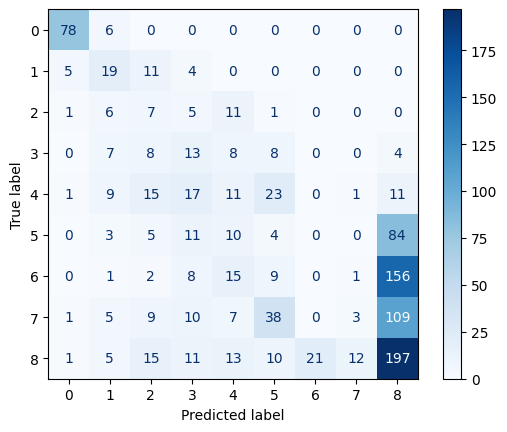

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        84
           1       0.31      0.49      0.38        39
           2       0.10      0.23      0.14        31
           3       0.16      0.27      0.20        48
           4       0.15      0.12      0.13        88
           5       0.04      0.03      0.04       117
           6       0.00      0.00      0.00       192
           7       0.18      0.02      0.03       182
           8       0.35      0.69      0.47       285

    accuracy                           0.31      1066
   macro avg       0.24      0.31      0.26      1066
weighted avg       0.23      0.31      0.24      1066

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
91/91 [==============================] - 3s 28ms/step


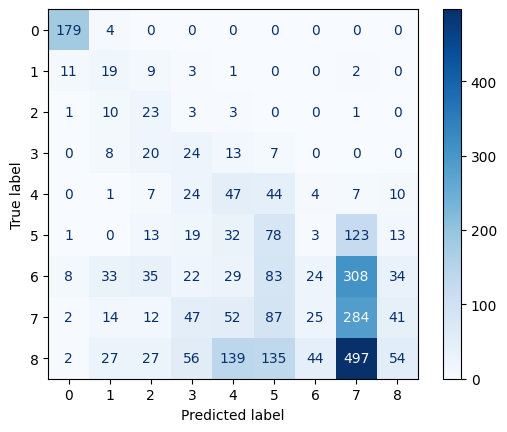

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       183
           1       0.16      0.42      0.24        45
           2       0.16      0.56      0.25        41
           3       0.12      0.33      0.18        72
           4       0.15      0.33      0.20       144
           5       0.18      0.28      0.22       282
           6       0.24      0.04      0.07       576
           7       0.23      0.50      0.32       564
           8       0.36      0.06      0.10       981

    accuracy                           0.25      2888
   macro avg       0.28      0.39      0.28      2888
weighted avg       0.30      0.25      0.21      2888

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
27/27 [==============================] - 1s 29ms/step


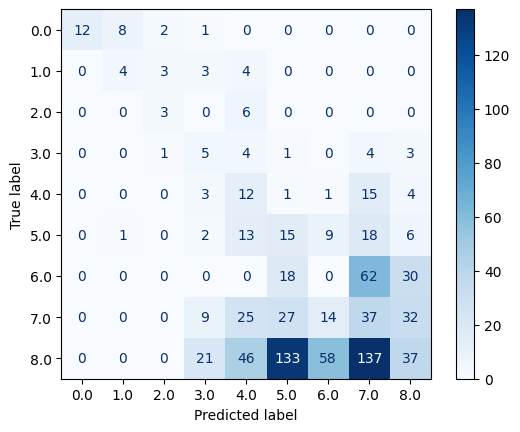

              precision    recall  f1-score   support

         0.0       1.00      0.52      0.69        23
         1.0       0.31      0.29      0.30        14
         2.0       0.33      0.33      0.33         9
         3.0       0.11      0.28      0.16        18
         4.0       0.11      0.33      0.16        36
         5.0       0.08      0.23      0.12        64
         6.0       0.00      0.00      0.00       110
         7.0       0.14      0.26      0.18       144
         8.0       0.33      0.09      0.14       432

    accuracy                           0.15       850
   macro avg       0.27      0.26      0.23       850
weighted avg       0.24      0.15      0.15       850

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
30/30 [==============================] - 1s 29ms/step


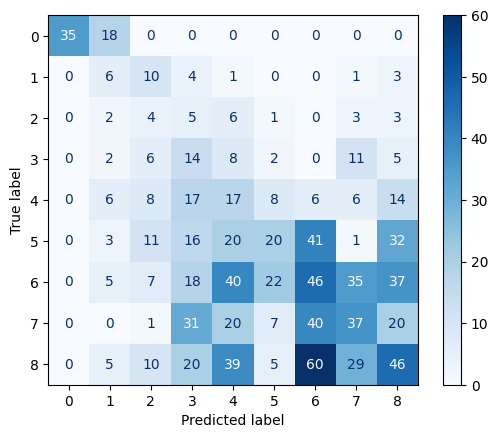

              precision    recall  f1-score   support

           0       1.00      0.66      0.80        53
           1       0.13      0.24      0.17        25
           2       0.07      0.17      0.10        24
           3       0.11      0.29      0.16        48
           4       0.11      0.21      0.15        82
           5       0.31      0.14      0.19       144
           6       0.24      0.22      0.23       210
           7       0.30      0.24      0.27       156
           8       0.29      0.21      0.25       214

    accuracy                           0.24       956
   macro avg       0.28      0.26      0.26       956
weighted avg       0.29      0.24      0.25       956

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
82/82 [==============================] - 3s 30ms/step


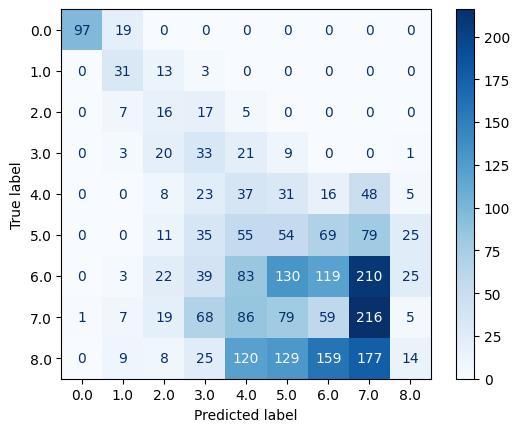

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       116
         1.0       0.39      0.66      0.49        47
         2.0       0.14      0.36      0.20        45
         3.0       0.14      0.38      0.20        87
         4.0       0.09      0.22      0.13       168
         5.0       0.12      0.16      0.14       328
         6.0       0.28      0.19      0.23       631
         7.0       0.30      0.40      0.34       540
         8.0       0.19      0.02      0.04       641

    accuracy                           0.24      2603
   macro avg       0.29      0.36      0.30      2603
weighted avg       0.26      0.24      0.22      2603

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
58/58 [==============================] - 2s 30ms/step


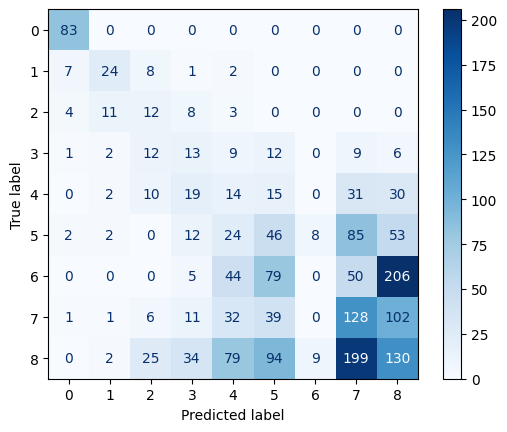

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        83
           1       0.55      0.57      0.56        42
           2       0.16      0.32      0.22        38
           3       0.13      0.20      0.16        64
           4       0.07      0.12      0.09       121
           5       0.16      0.20      0.18       232
           6       0.00      0.00      0.00       384
           7       0.25      0.40      0.31       320
           8       0.25      0.23      0.24       572

    accuracy                           0.24      1856
   macro avg       0.27      0.34      0.30      1856
weighted avg       0.20      0.24      0.22      1856


Mean accuracy of individuum: 0.2476, Standard deviation of individuum: 0.0525


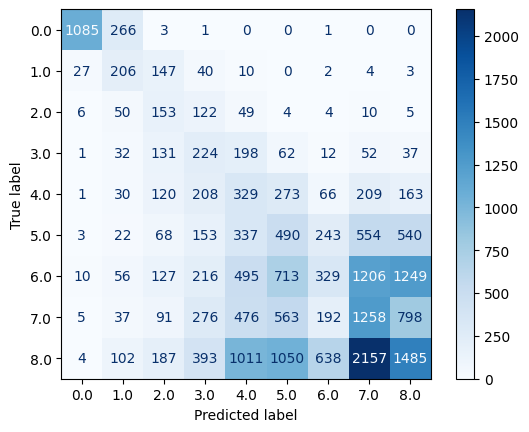

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      1356
         1.0       0.26      0.47      0.33       439
         2.0       0.15      0.38      0.21       403
         3.0       0.14      0.30      0.19       749
         4.0       0.11      0.24      0.15      1399
         5.0       0.16      0.20      0.18      2410
         6.0       0.22      0.07      0.11      4401
         7.0       0.23      0.34      0.28      3696
         8.0       0.35      0.21      0.26      7027

    accuracy                           0.25     21880
   macro avg       0.28      0.33      0.29     21880
weighted avg       0.29      0.25      0.25     21880



In [8]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)





# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,72,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)

    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping

    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv , y_train_indiv, test_size=0.20, shuffle = False)

    
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)


    

    # Train the model on the current fold
    filename =  "Models/Hybrid_Population_%i.hdf5" % (count)
    model_CV_D = tf.keras.models.load_model(filename)

    


    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Neu_Hybrid_Indi_%i.png" % (count)
   #plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1






# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
#name_img_test = "Confusion_Matrices/Hybrid_Indi_All.png" 
#plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

## LSTM Model

In [9]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

X, Y = [], []
X_val, Y_val = [], [] 
subject_IDs = ['540', '544', '552',  '559', '563', '567', '570', '575', '584', '588', '591','596']
path = 'GAPS_DATA/TRAIN/'

## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    frames  = []
    X_subject, y_subject = [], []
# store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

# create list of the csv files
    for file in csv_files:
        df = pd.read_csv(file)
        frames.append(df)
        df = pd.read_csv(file)
        df['glucose'] = df['glucose'].astype(int)
        Xdata, Ydata = create_dataset(df[['glucose', 'basal', 'bolus', 'macc']], df['Class'], time_steps=96, step=1)
        Xdata = Xdata.reshape(-1, 96, 4)
        Ydata = Ydata.reshape(-1, 1)
        X_subject.append(Xdata)
        y_subject.append(Ydata)
    X_subject = np.vstack(X_subject)
    y_subject = np.vstack(y_subject)
    labels_dftest1 = pd.DataFrame(y_subject, columns = ['label'])
    class_occurencestest1 = np.bincount(labels_dftest1['label'])
    print(class_occurencestest1)

    X_s_train,  X_s_val, y_s_train, y_s_val = train_test_split(X_subject , y_subject, test_size=0.20, shuffle = False)
    X.append(X_s_train)
    Y.append(y_s_train)

    X_val.append(X_s_val)
    Y_val.append(y_s_val)

   
## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
# store all paths of csv files in one folder
    

    
## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
# store all paths of csv files in one folder


[ 894  291  277  523  933 1521 2418 1640 3086]
[ 184   78   69  110  192  398  842  861 2073]
[ 418  130  125  237  466  908 1520 1176 2154]
[ 441  152  138  268  522 1037 1950 1589 3066]
[ 327  124  118  217  415  685 1283 1114 2577]
[ 932  137  120  226  429  830 1495 1242 2698]
[ 227   87   77  135  238  396  720  686 1804]
[1158  261  236  437  834 1488 2534 1777 3140]
[ 130   70   64  126  236  404  589  528 1370]
[ 138   77   68  132  238  432  757  645 1448]
too short
[ 600  214  197  382  731 1263 2110 1807 3419]
too short
[ 259  136  122  218  425  788 1412 1273 2850]


[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
87/87 [==============================] - 2s 18ms/step


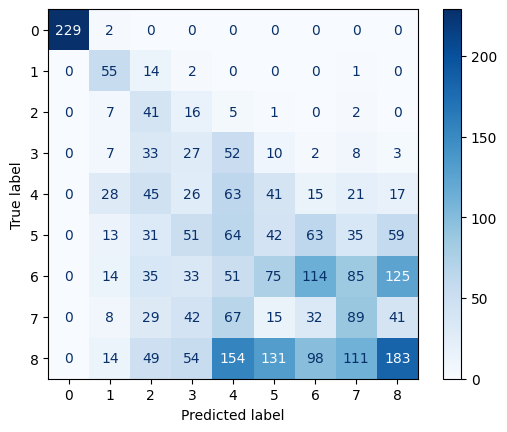

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       231
           1       0.37      0.76      0.50        72
           2       0.15      0.57      0.23        72
           3       0.11      0.19      0.14       142
           4       0.14      0.25      0.18       256
           5       0.13      0.12      0.12       358
           6       0.35      0.21      0.27       532
           7       0.25      0.28      0.26       323
           8       0.43      0.23      0.30       794

    accuracy                           0.30      2780
   macro avg       0.33      0.40      0.33      2780
weighted avg       0.35      0.30      0.31      2780

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
37/37 [==============================] - 1s 18ms/step


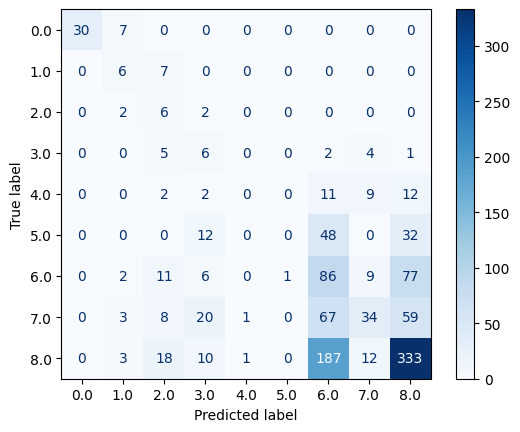

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        37
         1.0       0.26      0.46      0.33        13
         2.0       0.11      0.60      0.18        10
         3.0       0.10      0.33      0.16        18
         4.0       0.00      0.00      0.00        36
         5.0       0.00      0.00      0.00        92
         6.0       0.21      0.45      0.29       192
         7.0       0.50      0.18      0.26       192
         8.0       0.65      0.59      0.62       564

    accuracy                           0.43      1154
   macro avg       0.31      0.38      0.30      1154
weighted avg       0.47      0.43      0.43      1154

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
54/54 [==============================] - 1s 18ms/step


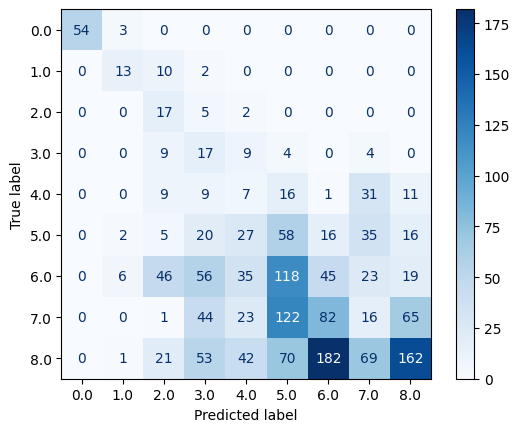

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        57
         1.0       0.52      0.52      0.52        25
         2.0       0.14      0.71      0.24        24
         3.0       0.08      0.40      0.14        43
         4.0       0.05      0.08      0.06        84
         5.0       0.15      0.32      0.20       179
         6.0       0.14      0.13      0.13       348
         7.0       0.09      0.05      0.06       353
         8.0       0.59      0.27      0.37       600

    accuracy                           0.23      1713
   macro avg       0.31      0.38      0.30      1713
weighted avg       0.32      0.23      0.24      1713

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
69/69 [==============================] - 2s 18ms/step


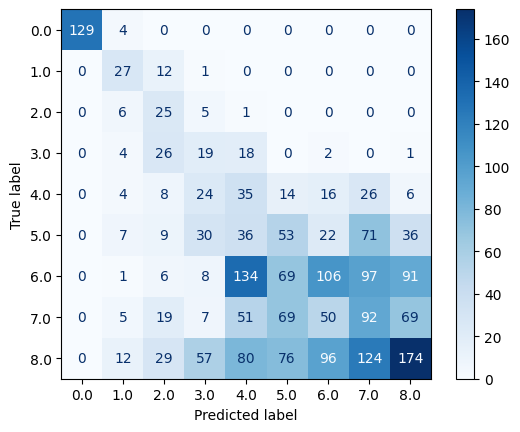

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       133
         1.0       0.39      0.68      0.49        40
         2.0       0.19      0.68      0.29        37
         3.0       0.13      0.27      0.17        70
         4.0       0.10      0.26      0.14       133
         5.0       0.19      0.20      0.19       264
         6.0       0.36      0.21      0.26       512
         7.0       0.22      0.25      0.24       362
         8.0       0.46      0.27      0.34       648

    accuracy                           0.30      2199
   macro avg       0.34      0.42      0.35      2199
weighted avg       0.36      0.30      0.31      2199

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
52/52 [==============================] - 1s 18ms/step


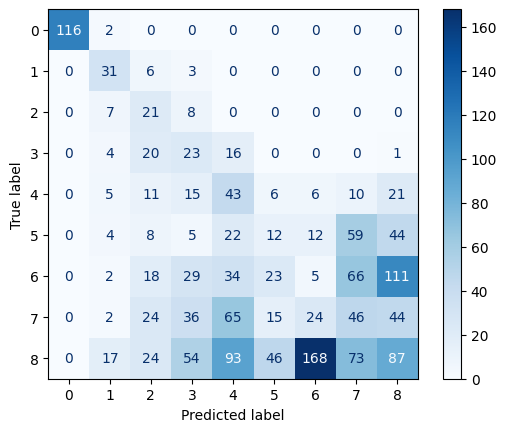

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       118
           1       0.42      0.78      0.54        40
           2       0.16      0.58      0.25        36
           3       0.13      0.36      0.19        64
           4       0.16      0.37      0.22       117
           5       0.12      0.07      0.09       166
           6       0.02      0.02      0.02       288
           7       0.18      0.18      0.18       256
           8       0.28      0.15      0.20       562

    accuracy                           0.23      1647
   macro avg       0.27      0.39      0.30      1647
weighted avg       0.24      0.23      0.22      1647

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
61/61 [==============================] - 2s 19ms/step


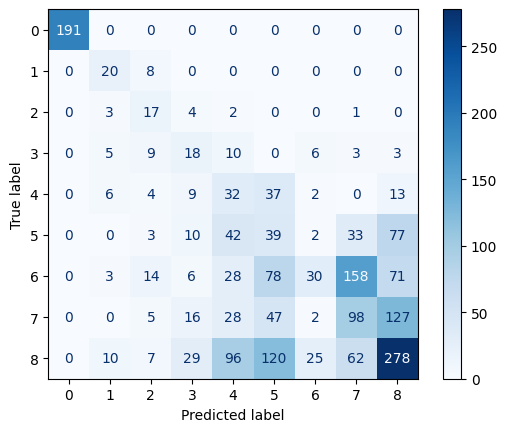

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       0.43      0.71      0.53        28
           2       0.25      0.63      0.36        27
           3       0.20      0.33      0.25        54
           4       0.13      0.31      0.19       103
           5       0.12      0.19      0.15       206
           6       0.45      0.08      0.13       388
           7       0.28      0.30      0.29       323
           8       0.49      0.44      0.46       627

    accuracy                           0.37      1947
   macro avg       0.37      0.44      0.37      1947
weighted avg       0.43      0.37      0.37      1947

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
33/33 [==============================] - 1s 18ms/step


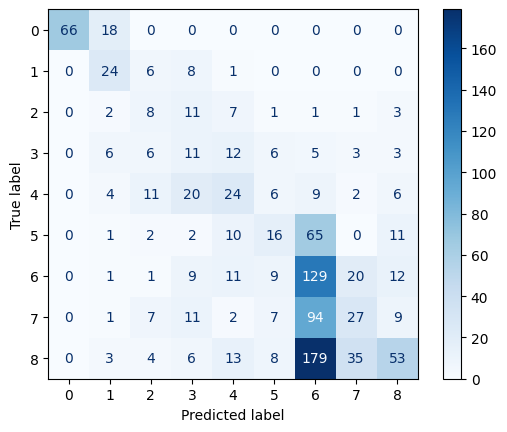

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        84
           1       0.40      0.62      0.48        39
           2       0.18      0.24      0.20        34
           3       0.14      0.21      0.17        52
           4       0.30      0.29      0.30        82
           5       0.30      0.15      0.20       107
           6       0.27      0.67      0.38       192
           7       0.31      0.17      0.22       158
           8       0.55      0.18      0.27       301

    accuracy                           0.34      1049
   macro avg       0.38      0.37      0.34      1049
weighted avg       0.41      0.34      0.33      1049

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
89/89 [==============================] - 2s 18ms/step


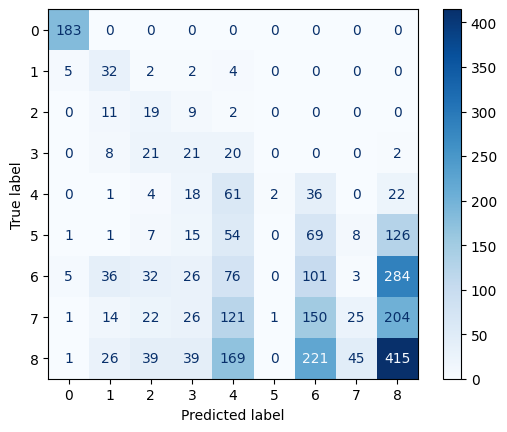

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       183
           1       0.25      0.71      0.37        45
           2       0.13      0.46      0.20        41
           3       0.13      0.29      0.18        72
           4       0.12      0.42      0.19       144
           5       0.00      0.00      0.00       281
           6       0.18      0.18      0.18       563
           7       0.31      0.04      0.08       564
           8       0.39      0.43      0.41       955

    accuracy                           0.30      2848
   macro avg       0.27      0.39      0.29      2848
weighted avg       0.30      0.30      0.27      2848

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
27/27 [==============================] - 1s 18ms/step


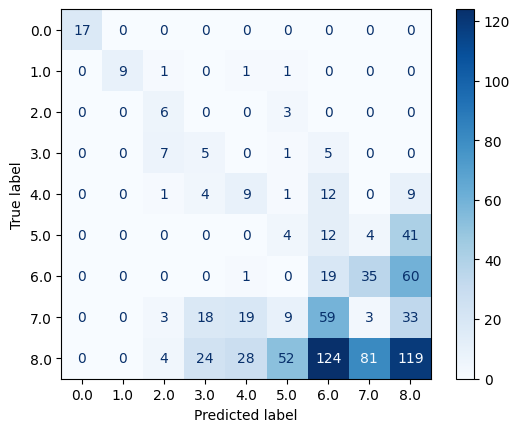

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      0.75      0.86        12
         2.0       0.27      0.67      0.39         9
         3.0       0.10      0.28      0.14        18
         4.0       0.16      0.25      0.19        36
         5.0       0.06      0.07      0.06        61
         6.0       0.08      0.17      0.11       115
         7.0       0.02      0.02      0.02       144
         8.0       0.45      0.28      0.34       432

    accuracy                           0.23       844
   macro avg       0.35      0.39      0.35       844
weighted avg       0.30      0.23      0.25       844

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
30/30 [==============================] - 1s 19ms/step


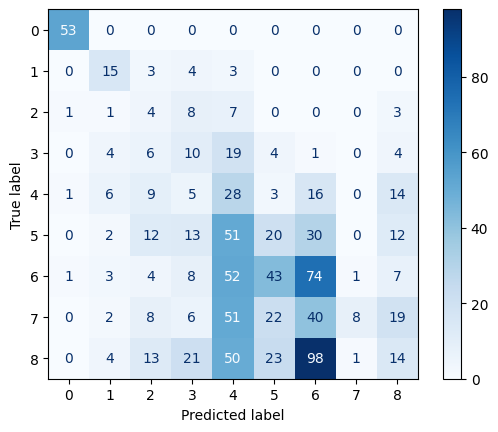

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.41      0.60      0.48        25
           2       0.07      0.17      0.10        24
           3       0.13      0.21      0.16        48
           4       0.11      0.34      0.16        82
           5       0.17      0.14      0.16       140
           6       0.29      0.38      0.33       193
           7       0.80      0.05      0.10       156
           8       0.19      0.06      0.09       224

    accuracy                           0.24       945
   macro avg       0.35      0.33      0.28       945
weighted avg       0.34      0.24      0.22       945

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
81/81 [==============================] - 2s 18ms/step


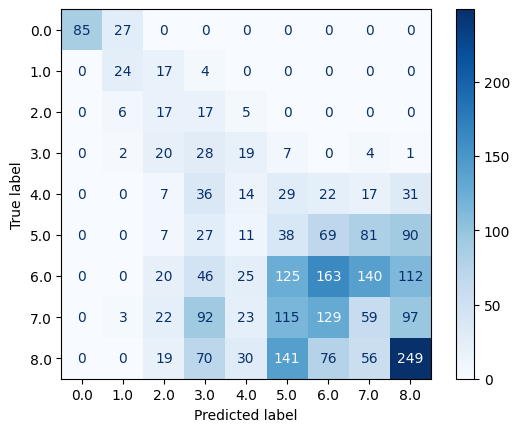

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       112
         1.0       0.39      0.53      0.45        45
         2.0       0.13      0.38      0.20        45
         3.0       0.09      0.35      0.14        81
         4.0       0.11      0.09      0.10       156
         5.0       0.08      0.12      0.10       323
         6.0       0.36      0.26      0.30       631
         7.0       0.17      0.11      0.13       540
         8.0       0.43      0.39      0.41       641

    accuracy                           0.26      2574
   macro avg       0.31      0.33      0.30      2574
weighted avg       0.30      0.26      0.27      2574

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
57/57 [==============================] - 1s 18ms/step


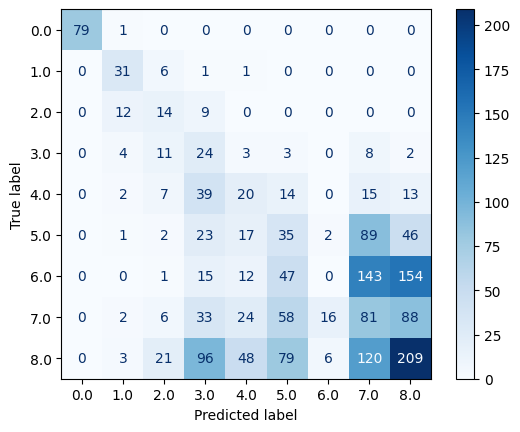

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        80
         1.0       0.55      0.79      0.65        39
         2.0       0.21      0.40      0.27        35
         3.0       0.10      0.44      0.16        55
         4.0       0.16      0.18      0.17       110
         5.0       0.15      0.16      0.16       215
         6.0       0.00      0.00      0.00       372
         7.0       0.18      0.26      0.21       308
         8.0       0.41      0.36      0.38       582

    accuracy                           0.27      1796
   macro avg       0.31      0.40      0.33      1796
weighted avg       0.25      0.27      0.26      1796


Mean accuracy of individuum: 0.2929, Standard deviation of individuum: 0.0613


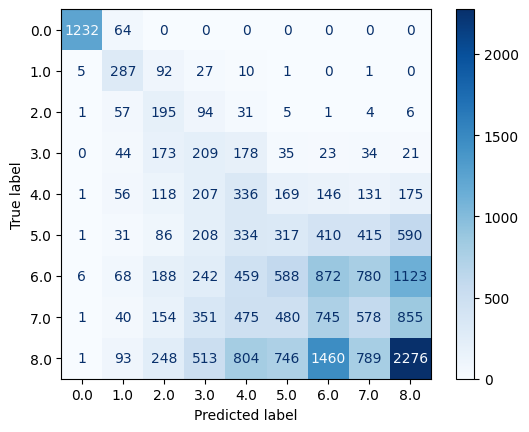

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1296
         1.0       0.39      0.68      0.49       423
         2.0       0.16      0.49      0.24       394
         3.0       0.11      0.29      0.16       717
         4.0       0.13      0.25      0.17      1339
         5.0       0.14      0.13      0.13      2392
         6.0       0.24      0.20      0.22      4326
         7.0       0.21      0.16      0.18      3679
         8.0       0.45      0.33      0.38      6930

    accuracy                           0.29     21496
   macro avg       0.31      0.39      0.33     21496
weighted avg       0.33      0.29      0.30     21496



In [10]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)










# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)


    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,96,4)
    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)



    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    #X_train_fold, X_val_fold,  y_train_fold, y_val_fold = train_test_split(
    #X_train_fold , y_train_fold , test_size=0.20, shuffle = False)

    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)





    # Train the model on the current fold
    filename =  "Models/LSTM_Population_%i.hdf5" % (count)
    model_CV_D = tf.keras.models.load_model(filename)


    
 

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Neu_LSTM_Indi_%i.png" % (count)
    #plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1




# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/LSTM_Indi_All.png" 
#plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

## Try with 5 classes

In [11]:
def create_dataset(X, y, time_steps=1, step=1):
    Xx, Yy = [], []
    if (len(X) < time_steps):
        print('too short')
    else:
        for i in range(0, len(X) - time_steps, step):
            label = y.iloc[i+time_steps-1]
            data = X.iloc[i:(i + time_steps)].values.astype(float)
            #data[:,0] = data[:,0].astype(int)
            #data[:,1:] = data[:,1:].astype(float)
            if ((y.iloc[i+time_steps-1] != 10) & (y.iloc[i+time_steps-1] != 9) & (y.iloc[i+time_steps-1] != 8) & (y.iloc[i+time_steps-1] != 7) & (y.iloc[i+time_steps-1] != 6)):
                Yy.append(label)
                Xx.append(data)

    return np.array(Xx).reshape(-1, 4), np.array(Yy).reshape(-1, 1)

In [12]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

X, Y = [], []
X_val, Y_val = [], [] 
subject_IDs = ['540', '544', '552',  '559', '563', '567', '570', '575', '584', '588', '591','596']
path = 'GAPS_DATA/TRAIN/'

## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    frames  = []
    X_subject, y_subject = [], []
# store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

# create list of the csv files
    for file in csv_files:
        df = pd.read_csv(file)
        frames.append(df)
        df = pd.read_csv(file)
        df['glucose'] = df['glucose'].astype(int)
        Xdata, Ydata = create_dataset(df[['glucose', 'basal', 'bolus', 'macc']], df['Class'], time_steps=48, step=1)
        Xdata = Xdata.reshape(-1, 48, 4)
        Ydata = Ydata.reshape(-1, 1)
        X_subject.append(Xdata)
        y_subject.append(Ydata)
    X_subject = np.vstack(X_subject)
    y_subject = np.vstack(y_subject)
    labels_dftest1 = pd.DataFrame(y_subject, columns = ['label'])
    class_occurencestest1 = np.bincount(labels_dftest1['label'])
    print(class_occurencestest1)

    X_s_train,  X_s_val, y_s_train, y_s_val = train_test_split(X_subject , y_subject, test_size=0.20, shuffle = False)
    X.append(X_s_train)
    Y.append(y_s_train)

    X_val.append(X_s_val)
    Y_val.append(y_s_val)

   
## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
# store all paths of csv files in one folder
    
    
## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
# store all paths of csv files in one folder


[ 939  301  285  536  969 1609]
[184  78  69 110 192 398]
[434 136 131 249 489 931]
[ 508  170  154  294  565 1090]
[327 124 118 217 415 685]
[943 140 125 238 453 867]
[227  87  77 137 250 420]
[1211  276  248  461  877 1532]
[130  70  64 126 236 404]
[138  77  68 132 241 456]
[ 651  223  204  389  739 1282]
[299 147 131 230 444 846]


### ResNet

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
 1/35 [..............................] - ETA: 4s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 1s 15ms/step


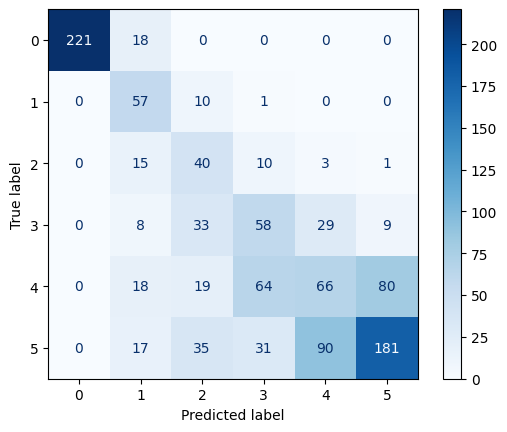

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       239
           1       0.43      0.84      0.57        68
           2       0.29      0.58      0.39        69
           3       0.35      0.42      0.39       137
           4       0.35      0.27      0.30       247
           5       0.67      0.51      0.58       354

    accuracy                           0.56      1114
   macro avg       0.52      0.59      0.53      1114
weighted avg       0.59      0.56      0.56      1114

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
1/8 [==>...........................] - ETA: 0s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 15ms/step


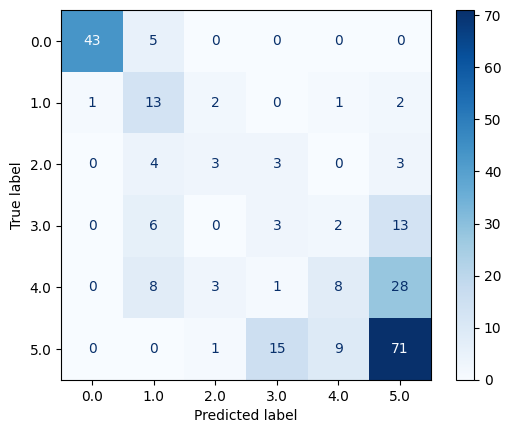

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.93        48
         1.0       0.36      0.68      0.47        19
         2.0       0.33      0.23      0.27        13
         3.0       0.14      0.12      0.13        24
         4.0       0.40      0.17      0.24        48
         5.0       0.61      0.74      0.67        96

    accuracy                           0.57       248
   macro avg       0.47      0.47      0.45       248
weighted avg       0.56      0.57      0.55       248

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
 1/18 [>.............................] - ETA: 2s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 0s 15ms/step


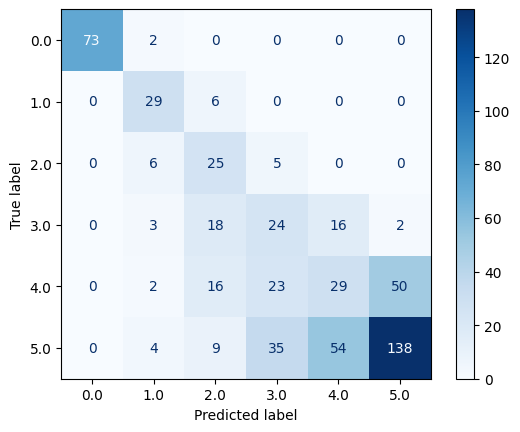

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        75
         1.0       0.63      0.83      0.72        35
         2.0       0.34      0.69      0.45        36
         3.0       0.28      0.38      0.32        63
         4.0       0.29      0.24      0.26       120
         5.0       0.73      0.57      0.64       240

    accuracy                           0.56       569
   macro avg       0.54      0.62      0.56       569
weighted avg       0.59      0.56      0.56       569

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
 1/21 [>.............................] - ETA: 2s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 15ms/step


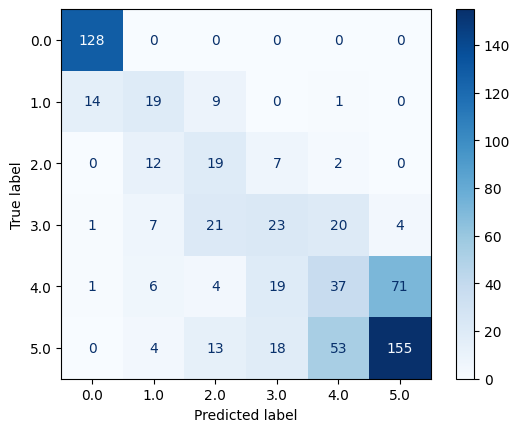

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       128
         1.0       0.40      0.44      0.42        43
         2.0       0.29      0.47      0.36        40
         3.0       0.34      0.30      0.32        76
         4.0       0.33      0.27      0.29       138
         5.0       0.67      0.64      0.66       243

    accuracy                           0.57       668
   macro avg       0.49      0.52      0.50       668
weighted avg       0.56      0.57      0.56       668

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
 1/15 [=>............................] - ETA: 1s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 0s 14ms/step


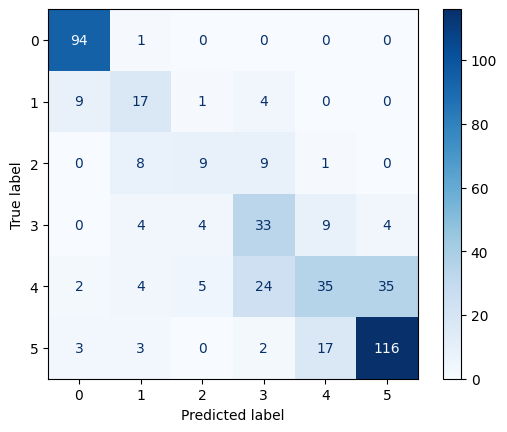

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        95
           1       0.46      0.55      0.50        31
           2       0.47      0.33      0.39        27
           3       0.46      0.61      0.52        54
           4       0.56      0.33      0.42       105
           5       0.75      0.82      0.78       141

    accuracy                           0.67       453
   macro avg       0.60      0.61      0.59       453
weighted avg       0.66      0.67      0.66       453

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
 1/21 [>.............................] - ETA: 2s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 15ms/step


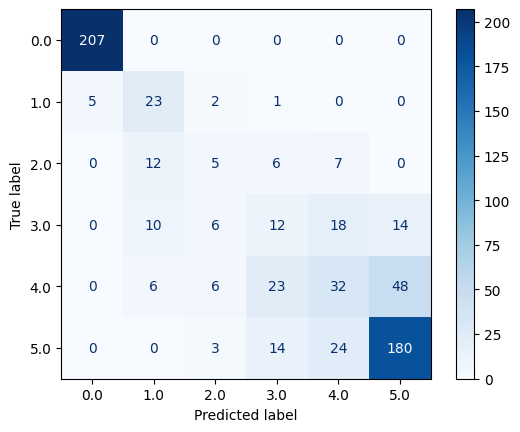

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       207
         1.0       0.45      0.74      0.56        31
         2.0       0.23      0.17      0.19        30
         3.0       0.21      0.20      0.21        60
         4.0       0.40      0.28      0.33       115
         5.0       0.74      0.81      0.78       221

    accuracy                           0.69       664
   macro avg       0.50      0.53      0.51       664
weighted avg       0.67      0.69      0.68       664

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
1/9 [==>...........................] - ETA: 1s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 15ms/step


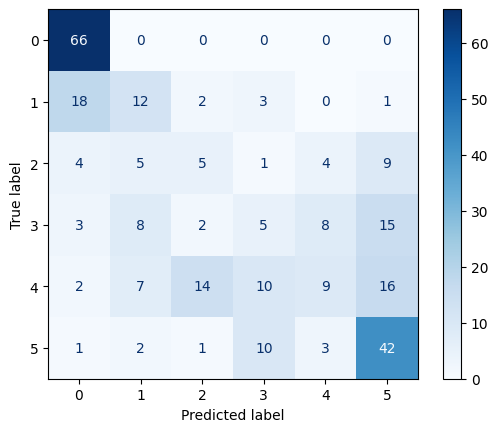

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        66
           1       0.35      0.33      0.34        36
           2       0.21      0.18      0.19        28
           3       0.17      0.12      0.14        41
           4       0.38      0.16      0.22        58
           5       0.51      0.71      0.59        59

    accuracy                           0.48       288
   macro avg       0.39      0.42      0.39       288
weighted avg       0.43      0.48      0.44       288

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
 1/35 [..............................] - ETA: 4s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 1s 15ms/step


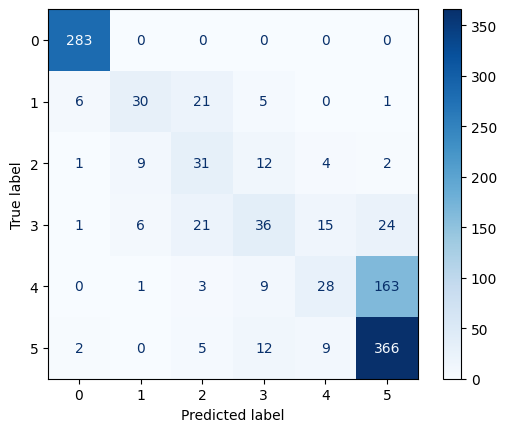

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       283
           1       0.65      0.48      0.55        63
           2       0.38      0.53      0.44        59
           3       0.49      0.35      0.41       103
           4       0.50      0.14      0.22       204
           5       0.66      0.93      0.77       394

    accuracy                           0.70      1106
   macro avg       0.61      0.57      0.56      1106
weighted avg       0.68      0.70      0.66      1106

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
1/8 [==>...........................] - ETA: 0s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 15ms/step


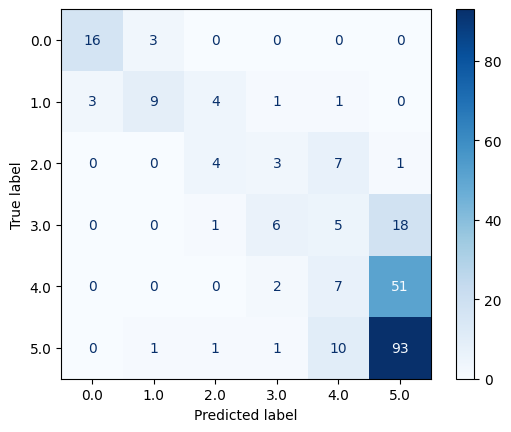

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        19
         1.0       0.69      0.50      0.58        18
         2.0       0.40      0.27      0.32        15
         3.0       0.46      0.20      0.28        30
         4.0       0.23      0.12      0.16        60
         5.0       0.57      0.88      0.69       106

    accuracy                           0.54       248
   macro avg       0.53      0.47      0.48       248
weighted avg       0.50      0.54      0.49       248

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
1/9 [==>...........................] - ETA: 1s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 14ms/step


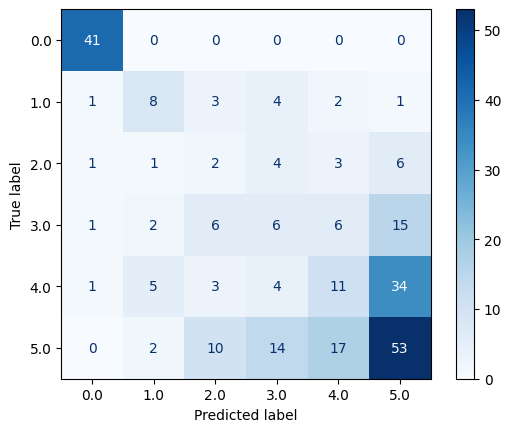

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        41
         1.0       0.44      0.42      0.43        19
         2.0       0.08      0.12      0.10        17
         3.0       0.19      0.17      0.18        36
         4.0       0.28      0.19      0.23        58
         5.0       0.49      0.55      0.52        96

    accuracy                           0.45       267
   macro avg       0.40      0.41      0.40       267
weighted avg       0.44      0.45      0.44       267

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
 1/27 [>.............................] - ETA: 3s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 1s 14ms/step


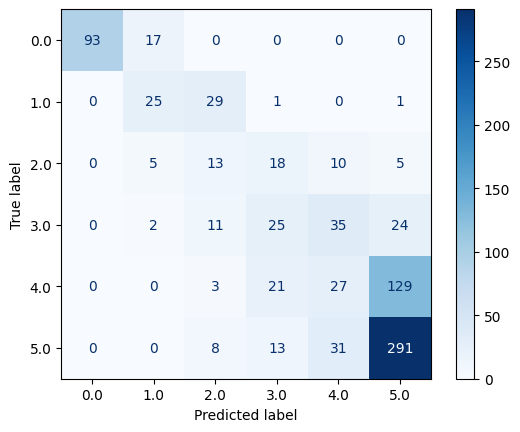

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       110
         1.0       0.51      0.45      0.48        56
         2.0       0.20      0.25      0.23        51
         3.0       0.32      0.26      0.29        97
         4.0       0.26      0.15      0.19       180
         5.0       0.65      0.85      0.73       343

    accuracy                           0.57       837
   macro avg       0.49      0.47      0.47       837
weighted avg       0.54      0.57      0.54       837

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
 1/16 [>.............................] - ETA: 1s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 15ms/step


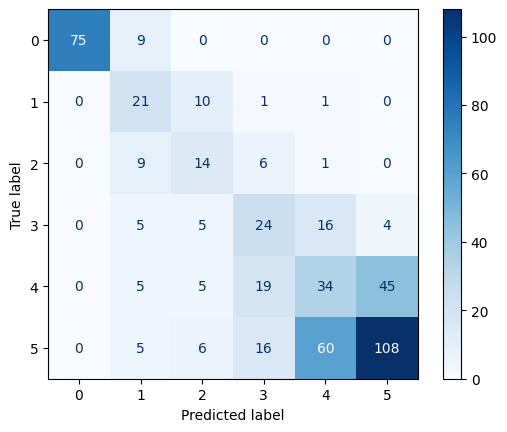

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        84
           1       0.39      0.64      0.48        33
           2       0.35      0.47      0.40        30
           3       0.36      0.44      0.40        54
           4       0.30      0.31      0.31       108
           5       0.69      0.55      0.61       195

    accuracy                           0.55       504
   macro avg       0.52      0.55      0.52       504
weighted avg       0.58      0.55      0.56       504


Mean accuracy of individuum: 0.5761, Standard deviation of individuum: 0.0730


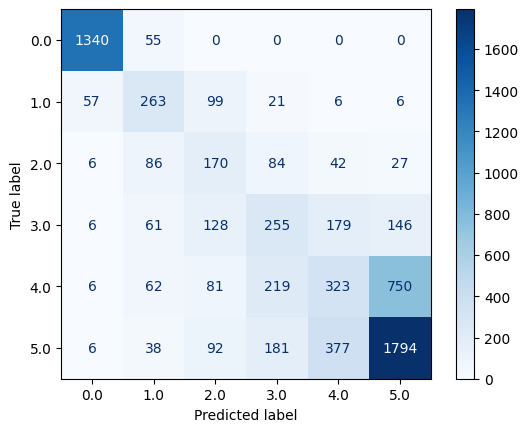

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1395
         1.0       0.47      0.58      0.52       452
         2.0       0.30      0.41      0.35       415
         3.0       0.34      0.33      0.33       775
         4.0       0.35      0.22      0.27      1441
         5.0       0.66      0.72      0.69      2488

    accuracy                           0.60      6966
   macro avg       0.51      0.54      0.52      6966
weighted avg       0.58      0.60      0.58      6966



In [13]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)





    





# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored



accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)



    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,48,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)



    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    #X_train_fold, X_val_fold,  y_train_fold, y_val_fold = train_test_split(
    #X_train_fold , y_train_fold , test_size=0.20, shuffle = False)



    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 

    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)





    # Train the model on the current fold
    filename =  "Models/ResNet_5_Population_%i.hdf5" % (count)
    model_CV_D = tf.keras.models.load_model(filename)
  
    

    name = "Models/Neu_ResNet_5_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Neu_ResNet_5_Indi_%i.png" % (count)
    #plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1







# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi,  cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/ResNet_5_All_indi.png" 
#plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

### LSTM

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
35/35 [==============================] - 1s 9ms/step


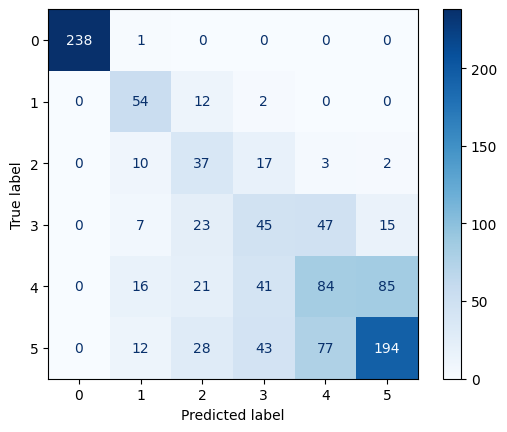

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.54      0.79      0.64        68
           2       0.31      0.54      0.39        69
           3       0.30      0.33      0.32       137
           4       0.40      0.34      0.37       247
           5       0.66      0.55      0.60       354

    accuracy                           0.59      1114
   macro avg       0.53      0.59      0.55      1114
weighted avg       0.60      0.59      0.59      1114

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
8/8 [==============================] - 0s 9ms/step


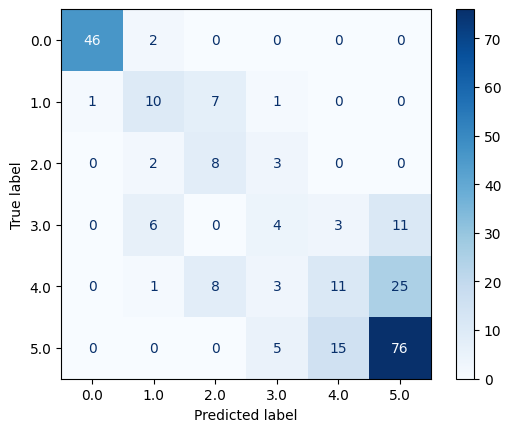

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        48
         1.0       0.48      0.53      0.50        19
         2.0       0.35      0.62      0.44        13
         3.0       0.25      0.17      0.20        24
         4.0       0.38      0.23      0.29        48
         5.0       0.68      0.79      0.73        96

    accuracy                           0.62       248
   macro avg       0.52      0.55      0.52       248
weighted avg       0.60      0.62      0.61       248

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
18/18 [==============================] - 1s 9ms/step


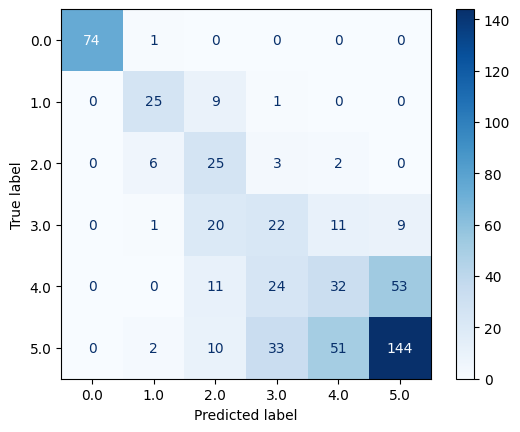

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        75
         1.0       0.71      0.71      0.71        35
         2.0       0.33      0.69      0.45        36
         3.0       0.27      0.35      0.30        63
         4.0       0.33      0.27      0.30       120
         5.0       0.70      0.60      0.65       240

    accuracy                           0.57       569
   macro avg       0.56      0.60      0.57       569
weighted avg       0.59      0.57      0.57       569

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
21/21 [==============================] - 1s 10ms/step


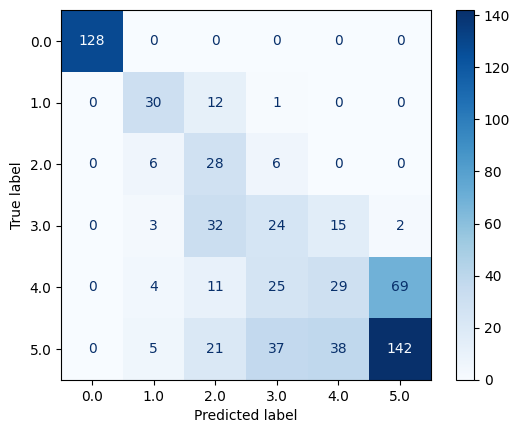

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       128
         1.0       0.62      0.70      0.66        43
         2.0       0.27      0.70      0.39        40
         3.0       0.26      0.32      0.28        76
         4.0       0.35      0.21      0.26       138
         5.0       0.67      0.58      0.62       243

    accuracy                           0.57       668
   macro avg       0.53      0.58      0.54       668
weighted avg       0.59      0.57      0.57       668

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
15/15 [==============================] - 1s 9ms/step


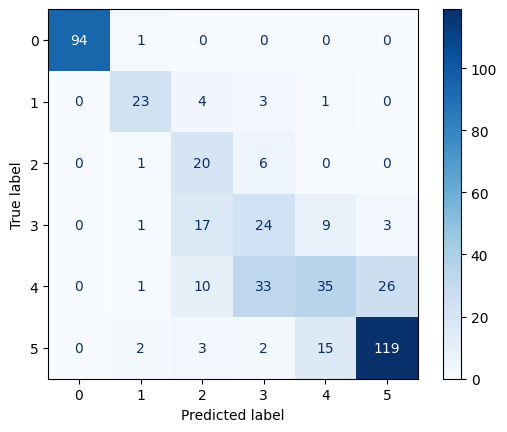

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.79      0.74      0.77        31
           2       0.37      0.74      0.49        27
           3       0.35      0.44      0.39        54
           4       0.58      0.33      0.42       105
           5       0.80      0.84      0.82       141

    accuracy                           0.70       453
   macro avg       0.65      0.68      0.65       453
weighted avg       0.71      0.70      0.69       453

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
21/21 [==============================] - 1s 9ms/step


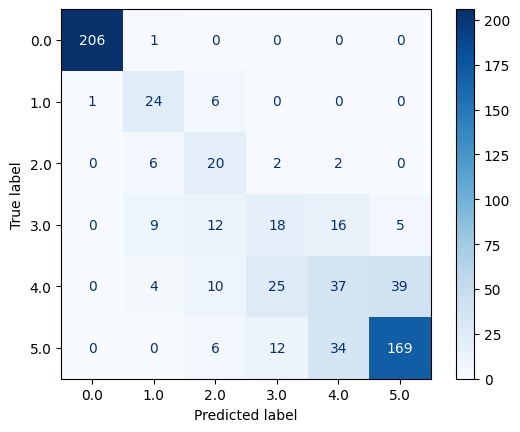

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       207
         1.0       0.55      0.77      0.64        31
         2.0       0.37      0.67      0.48        30
         3.0       0.32      0.30      0.31        60
         4.0       0.42      0.32      0.36       115
         5.0       0.79      0.76      0.78       221

    accuracy                           0.71       664
   macro avg       0.57      0.64      0.59       664
weighted avg       0.72      0.71      0.71       664

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
9/9 [==============================] - 0s 10ms/step


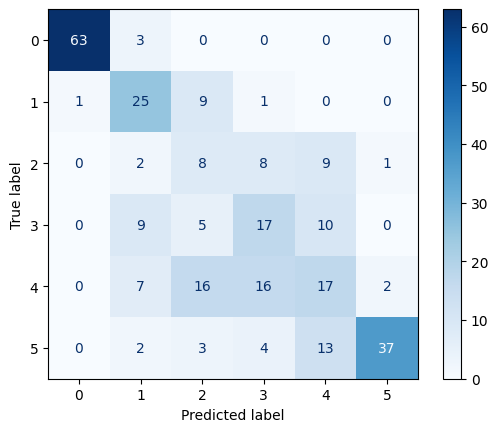

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.52      0.69      0.60        36
           2       0.20      0.29      0.23        28
           3       0.37      0.41      0.39        41
           4       0.35      0.29      0.32        58
           5       0.93      0.63      0.75        59

    accuracy                           0.58       288
   macro avg       0.56      0.54      0.54       288
weighted avg       0.62      0.58      0.59       288

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
35/35 [==============================] - 1s 9ms/step


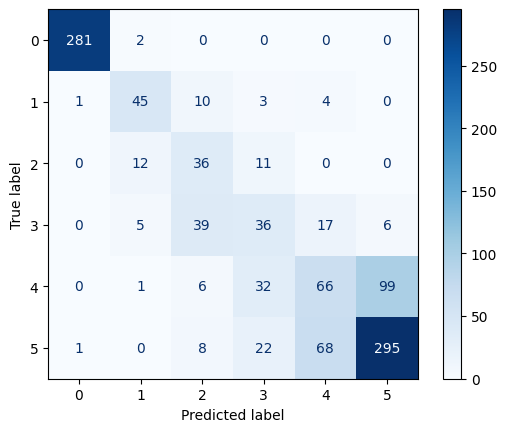

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       283
           1       0.69      0.71      0.70        63
           2       0.36      0.61      0.46        59
           3       0.35      0.35      0.35       103
           4       0.43      0.32      0.37       204
           5       0.74      0.75      0.74       394

    accuracy                           0.69      1106
   macro avg       0.59      0.62      0.60      1106
weighted avg       0.69      0.69      0.68      1106

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
8/8 [==============================] - 0s 9ms/step


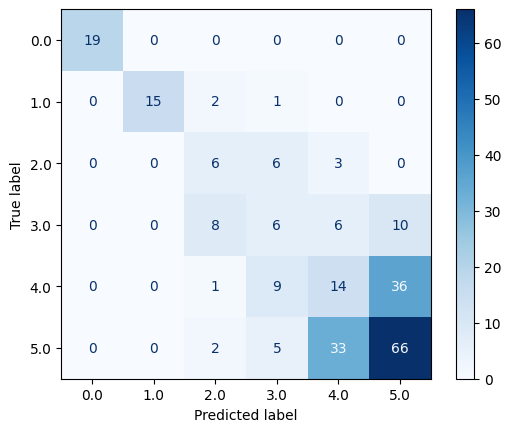

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.83      0.91        18
         2.0       0.32      0.40      0.35        15
         3.0       0.22      0.20      0.21        30
         4.0       0.25      0.23      0.24        60
         5.0       0.59      0.62      0.61       106

    accuracy                           0.51       248
   macro avg       0.56      0.55      0.55       248
weighted avg       0.51      0.51      0.51       248

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
9/9 [==============================] - 0s 9ms/step


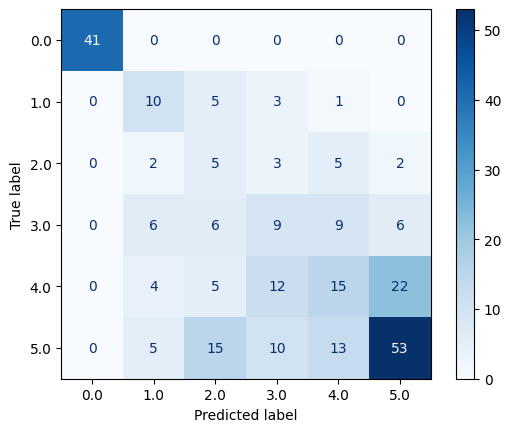

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       0.37      0.53      0.43        19
         2.0       0.14      0.29      0.19        17
         3.0       0.24      0.25      0.25        36
         4.0       0.35      0.26      0.30        58
         5.0       0.64      0.55      0.59        96

    accuracy                           0.50       267
   macro avg       0.46      0.48      0.46       267
weighted avg       0.53      0.50      0.51       267

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
27/27 [==============================] - 1s 9ms/step


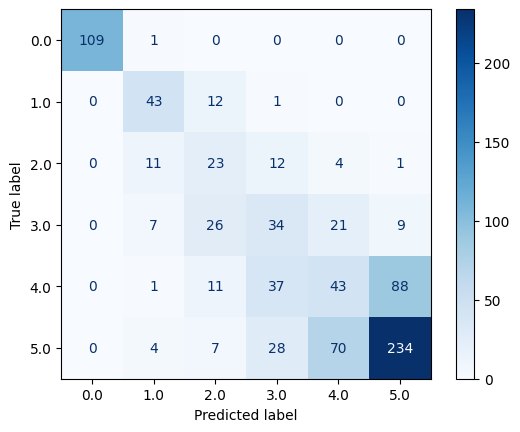

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       110
         1.0       0.64      0.77      0.70        56
         2.0       0.29      0.45      0.35        51
         3.0       0.30      0.35      0.33        97
         4.0       0.31      0.24      0.27       180
         5.0       0.70      0.68      0.69       343

    accuracy                           0.58       837
   macro avg       0.54      0.58      0.56       837
weighted avg       0.58      0.58      0.58       837

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
16/16 [==============================] - 1s 9ms/step


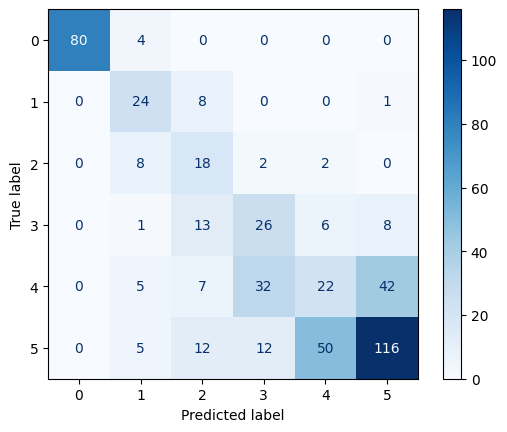

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.51      0.73      0.60        33
           2       0.31      0.60      0.41        30
           3       0.36      0.48      0.41        54
           4       0.28      0.20      0.23       108
           5       0.69      0.59      0.64       195

    accuracy                           0.57       504
   macro avg       0.53      0.59      0.55       504
weighted avg       0.58      0.57      0.57       504


Mean accuracy of individuum: 0.5980, Standard deviation of individuum: 0.0665


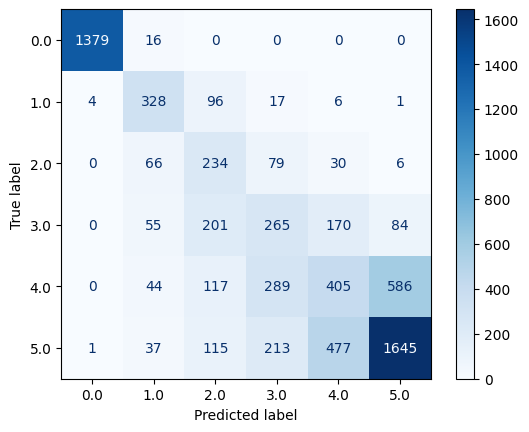

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1395
         1.0       0.60      0.73      0.66       452
         2.0       0.31      0.56      0.40       415
         3.0       0.31      0.34      0.32       775
         4.0       0.37      0.28      0.32      1441
         5.0       0.71      0.66      0.68      2488

    accuracy                           0.61      6966
   macro avg       0.55      0.59      0.56      6966
weighted avg       0.62      0.61      0.61      6966



In [14]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)







# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored



accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)


    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,48,4)
    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)



    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    #X_train_fold, X_val_fold,  y_train_fold, y_val_fold = train_test_split(
    #X_train_fold , y_train_fold , test_size=0.20, shuffle = False)



    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 

    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)



    
    

    # Train the model on the current fold
    filename =  "Models/LSTM_5_Population_%i.hdf5" % (count)
    model_CV_D = tf.keras.models.load_model(filename)
   


    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/LSTM_5_Indi_%i.png" % (count)
    #plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1





# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/LSTM_5_Indi_All.png" 
#plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

### Hybrid

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
35/35 [==============================] - 1s 19ms/step


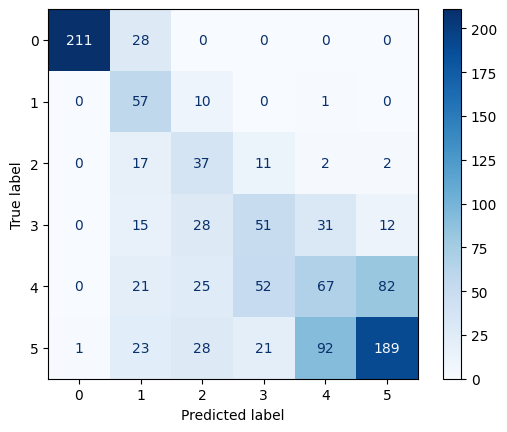

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       239
           1       0.35      0.84      0.50        68
           2       0.29      0.54      0.38        69
           3       0.38      0.37      0.38       137
           4       0.35      0.27      0.30       247
           5       0.66      0.53      0.59       354

    accuracy                           0.55      1114
   macro avg       0.50      0.57      0.51      1114
weighted avg       0.59      0.55      0.56      1114

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
8/8 [==============================] - 1s 19ms/step


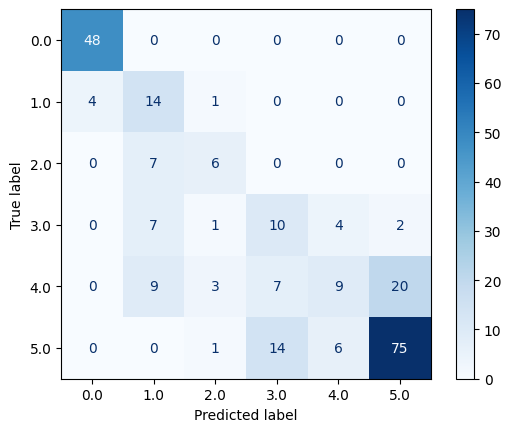

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        48
         1.0       0.38      0.74      0.50        19
         2.0       0.50      0.46      0.48        13
         3.0       0.32      0.42      0.36        24
         4.0       0.47      0.19      0.27        48
         5.0       0.77      0.78      0.78        96

    accuracy                           0.65       248
   macro avg       0.56      0.60      0.56       248
weighted avg       0.66      0.65      0.64       248

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
18/18 [==============================] - 1s 19ms/step


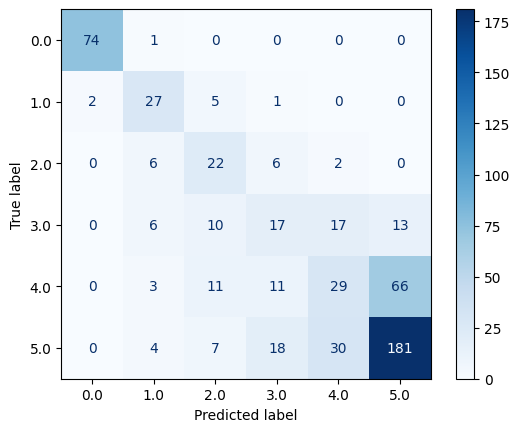

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.57      0.77      0.66        35
         2.0       0.40      0.61      0.48        36
         3.0       0.32      0.27      0.29        63
         4.0       0.37      0.24      0.29       120
         5.0       0.70      0.75      0.72       240

    accuracy                           0.62       569
   macro avg       0.56      0.61      0.57       569
weighted avg       0.60      0.62      0.60       569

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
21/21 [==============================] - 1s 20ms/step


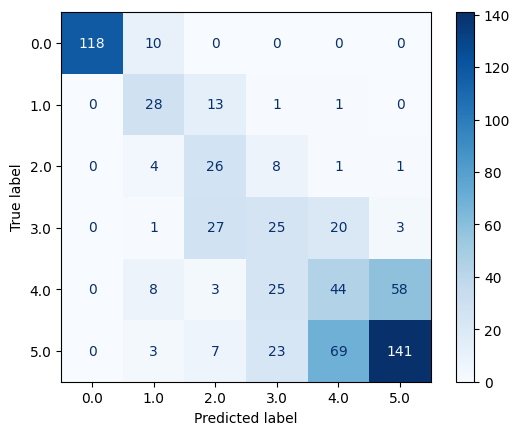

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       128
         1.0       0.52      0.65      0.58        43
         2.0       0.34      0.65      0.45        40
         3.0       0.30      0.33      0.32        76
         4.0       0.33      0.32      0.32       138
         5.0       0.69      0.58      0.63       243

    accuracy                           0.57       668
   macro avg       0.53      0.58      0.54       668
weighted avg       0.60      0.57      0.58       668

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
15/15 [==============================] - 1s 19ms/step


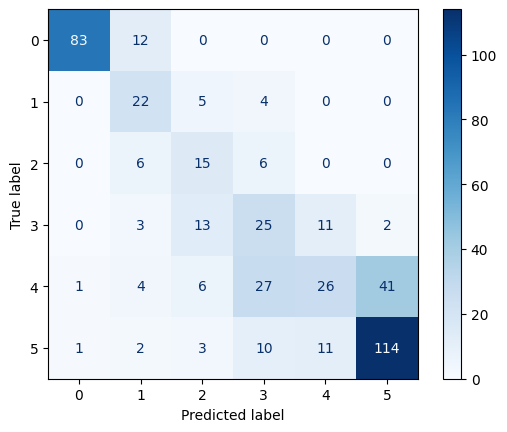

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        95
           1       0.45      0.71      0.55        31
           2       0.36      0.56      0.43        27
           3       0.35      0.46      0.40        54
           4       0.54      0.25      0.34       105
           5       0.73      0.81      0.77       141

    accuracy                           0.63       453
   macro avg       0.57      0.61      0.57       453
weighted avg       0.65      0.63      0.62       453

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
21/21 [==============================] - 1s 20ms/step


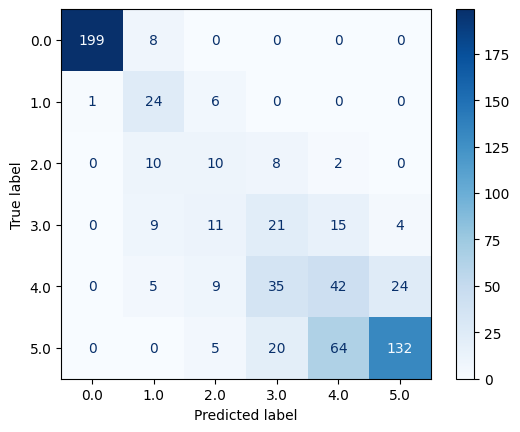

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       207
         1.0       0.43      0.77      0.55        31
         2.0       0.24      0.33      0.28        30
         3.0       0.25      0.35      0.29        60
         4.0       0.34      0.37      0.35       115
         5.0       0.82      0.60      0.69       221

    accuracy                           0.64       664
   macro avg       0.51      0.56      0.52       664
weighted avg       0.70      0.64      0.66       664

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
9/9 [==============================] - 1s 21ms/step


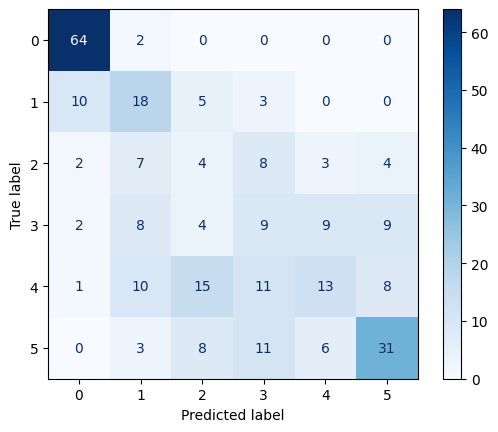

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        66
           1       0.38      0.50      0.43        36
           2       0.11      0.14      0.12        28
           3       0.21      0.22      0.22        41
           4       0.42      0.22      0.29        58
           5       0.60      0.53      0.56        59

    accuracy                           0.48       288
   macro avg       0.42      0.43      0.42       288
weighted avg       0.48      0.48      0.47       288

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
35/35 [==============================] - 1s 22ms/step


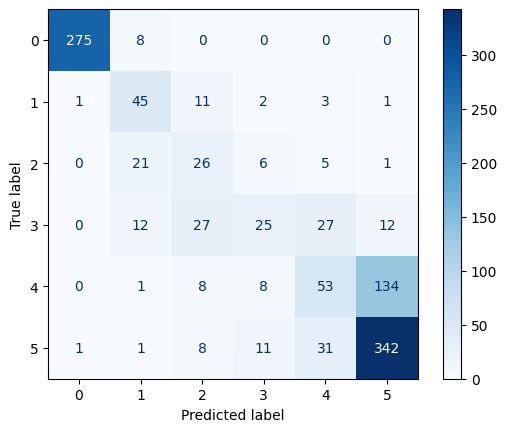

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       283
           1       0.51      0.71      0.60        63
           2       0.33      0.44      0.37        59
           3       0.48      0.24      0.32       103
           4       0.45      0.26      0.33       204
           5       0.70      0.87      0.77       394

    accuracy                           0.69      1106
   macro avg       0.58      0.58      0.56      1106
weighted avg       0.68      0.69      0.67      1106

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
8/8 [==============================] - 1s 19ms/step


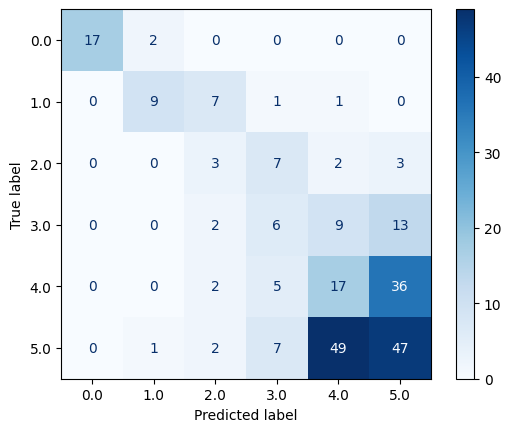

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        19
         1.0       0.75      0.50      0.60        18
         2.0       0.19      0.20      0.19        15
         3.0       0.23      0.20      0.21        30
         4.0       0.22      0.28      0.25        60
         5.0       0.47      0.44      0.46       106

    accuracy                           0.40       248
   macro avg       0.48      0.42      0.44       248
weighted avg       0.43      0.40      0.41       248

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
9/9 [==============================] - 1s 24ms/step


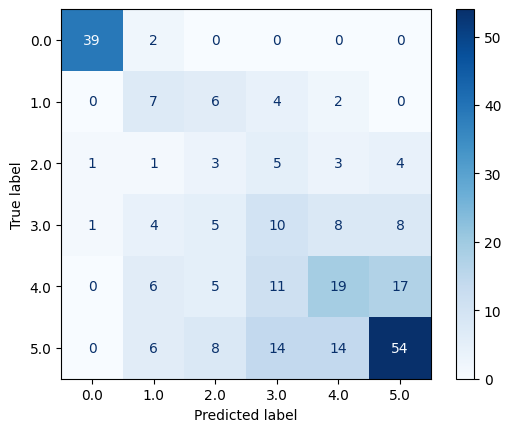

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        41
         1.0       0.27      0.37      0.31        19
         2.0       0.11      0.18      0.14        17
         3.0       0.23      0.28      0.25        36
         4.0       0.41      0.33      0.37        58
         5.0       0.65      0.56      0.60        96

    accuracy                           0.49       267
   macro avg       0.44      0.44      0.44       267
weighted avg       0.53      0.49      0.51       267

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
27/27 [==============================] - 1s 20ms/step


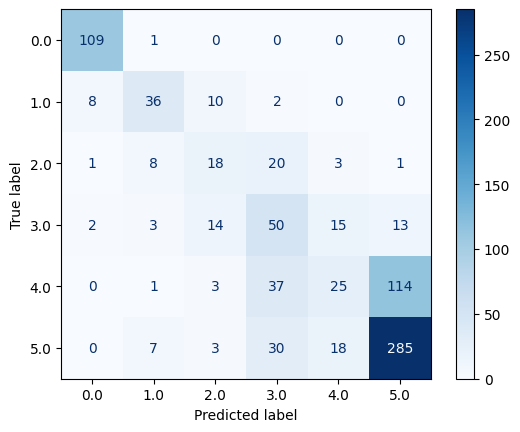

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       110
         1.0       0.64      0.64      0.64        56
         2.0       0.38      0.35      0.36        51
         3.0       0.36      0.52      0.42        97
         4.0       0.41      0.14      0.21       180
         5.0       0.69      0.83      0.75       343

    accuracy                           0.62       837
   macro avg       0.56      0.58      0.56       837
weighted avg       0.60      0.62      0.59       837

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
16/16 [==============================] - 1s 21ms/step


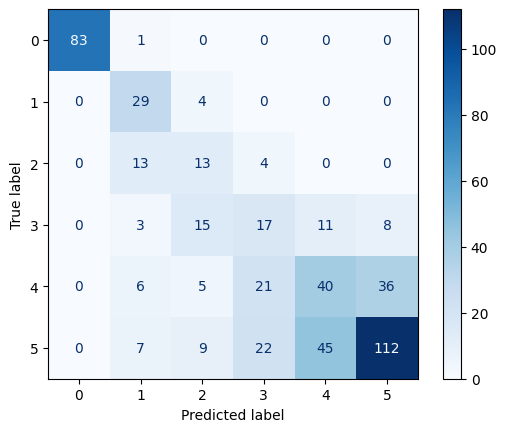

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        84
           1       0.49      0.88      0.63        33
           2       0.28      0.43      0.34        30
           3       0.27      0.31      0.29        54
           4       0.42      0.37      0.39       108
           5       0.72      0.57      0.64       195

    accuracy                           0.58       504
   macro avg       0.53      0.59      0.55       504
weighted avg       0.61      0.58      0.59       504


Mean accuracy of individuum: 0.5784, Standard deviation of individuum: 0.0808


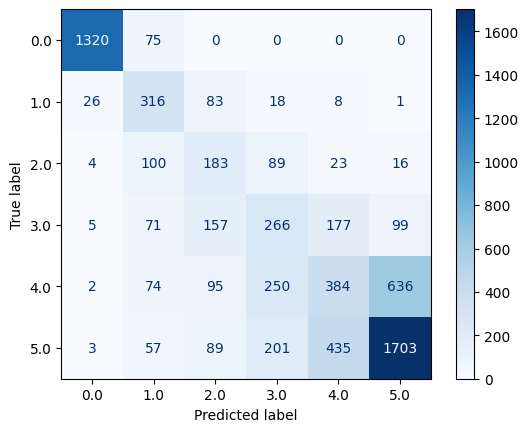

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1395
         1.0       0.46      0.70      0.55       452
         2.0       0.30      0.44      0.36       415
         3.0       0.32      0.34      0.33       775
         4.0       0.37      0.27      0.31      1441
         5.0       0.69      0.68      0.69      2488

    accuracy                           0.60      6966
   macro avg       0.52      0.56      0.53      6966
weighted avg       0.60      0.60      0.60      6966



In [15]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)






    





# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)


    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,48,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    #X_train_fold, X_val_fold,  y_train_fold, y_val_fold = train_test_split(
    #X_train_fold , y_train_fold , test_size=0.20, shuffle = False)



    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 

    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)





    # Train the model on the current fold
    filename =  "Models/Hybrid_5_Population_%i.hdf5" % (count)
    model_CV_D = tf.keras.models.load_model(filename)
   

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Neu_Hybrid_5_Indi_%i.png" % (count)
   # plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1


# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")
ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/Hybrid_5_Indi_All.png"
#plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))